In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_twice_merged=pd.read_csv('twice_merged.csv')
df_twice_merged.head()

,Unnamed: 0,Unnamed: 0.1,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,...,GRADE,prev_score,prev_critical,A,prev_A,DBA,CUISINE DESCRIPTION,is_chain,Community Board,BORO
0,0,1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,...,A,7.0,1,True,True,MORRIS PARK BAKE SHOP,Bakery,0,211.0,Bronx
1,1,2,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,...,B,5.0,0,False,True,MORRIS PARK BAKE SHOP,Bakery,0,211.0,Bronx
2,2,4,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,...,A,48.0,3,True,False,WENDY'S,Hamburgers,1,309.0,Brooklyn
3,3,5,30112340,2018-03-13,12.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,...,A,7.0,1,True,True,WENDY'S,Hamburgers,1,309.0,Brooklyn
4,4,6,30112340,2019-03-04,13.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,...,A,12.0,1,True,True,WENDY'S,Hamburgers,1,309.0,Brooklyn


In [3]:
df_matrix=df_twice_merged[['A', 'prev_score','prev_critical','Community Board','CUISINE DESCRIPTION']]
df_matrix.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43894 entries, 0 to 43893
Data columns (total 5 columns):
A                      43894 non-null bool
prev_score             43894 non-null float64
prev_critical          43894 non-null int64
Community Board        43067 non-null float64
CUISINE DESCRIPTION    43894 non-null object
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 1.4+ MB


In [4]:
df_matrix.dropna(inplace=True)
df_matrix['Community Board']=df_matrix['Community Board'].astype(int).astype(str)
df_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43067 entries, 0 to 43893
Data columns (total 5 columns):
A                      43067 non-null bool
prev_score             43067 non-null float64
prev_critical          43067 non-null int64
Community Board        43067 non-null object
CUISINE DESCRIPTION    43067 non-null object
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 1.7+ MB


C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
df_matrix_sparse=pd.get_dummies(df_matrix)
df_matrix_sparse.head()

,A,prev_score,prev_critical,Community Board_101,Community Board_102,Community Board_103,Community Board_104,Community Board_105,Community Board_106,Community Board_107,...,CUISINE DESCRIPTION_Soups & Sandwiches,CUISINE DESCRIPTION_Southwestern,CUISINE DESCRIPTION_Spanish,CUISINE DESCRIPTION_Steak,CUISINE DESCRIPTION_Tapas,CUISINE DESCRIPTION_Tex-Mex,CUISINE DESCRIPTION_Thai,CUISINE DESCRIPTION_Turkish,CUISINE DESCRIPTION_Vegetarian,CUISINE DESCRIPTION_Vietnamese/Cambodian/Malaysia
0,True,7.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,True,48.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,True,7.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,True,12.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X=df_matrix_sparse.drop(columns=['A'])
y=df_matrix_sparse['A']

In [7]:
import itertools
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    '''Stylized Visual Confusion Matrix provided by Flatiron School'''
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
#     class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()
    

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
param_grid_ada={'n_estimators': [30, 50, 70,100,150],
                'learning_rate': [1.0, 0.5, 0.1]}
grid_ada=GridSearchCV(estimator=AdaBoostClassifier(),
                     param_grid=param_grid_ada,
                     cv=3,
                     verbose=2)
grid_ada.fit(X_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] learning_rate=1.0, n_estimators=30 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... learning_rate=1.0, n_estimators=30, total=   2.6s
[CV] learning_rate=1.0, n_estimators=30 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] ............... learning_rate=1.0, n_estimators=30, total=   1.5s
[CV] learning_rate=1.0, n_estimators=30 ..............................
[CV] ............... learning_rate=1.0, n_estimators=30, total=   1.4s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=   2.3s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=   2.3s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=   2.3s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] ............... learning_rate=1.0, n_estimators=70, total=   3.2s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] ............... learning_rate=1.0, n_estimators=70, total=   3.2s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [1.0, 0.5, 0.1],
                         'n_estimators': [30, 50, 70, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [10]:
grid_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [11]:
grid_ada.best_score_

0.6408150233651642

              precision    recall  f1-score   support

       False       0.58      0.42      0.49      3509
        True       0.67      0.79      0.72      5105

    accuracy                           0.64      8614
   macro avg       0.62      0.61      0.60      8614
weighted avg       0.63      0.64      0.63      8614



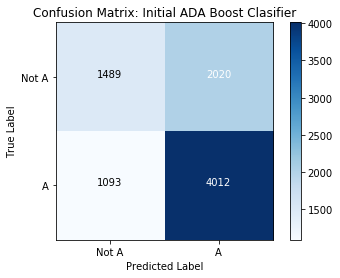

In [12]:
y_pred = grid_ada.best_estimator_.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report


print(classification_report(y_test,y_pred))
show_cf(y_test,y_pred,class_names=['Not A','A'],model_name='Initial ADA Boost Clasifier')

In [13]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_sample(X, y) 

Using TensorFlow backend.


In [14]:
from sklearn.model_selection import train_test_split
X_resampled_train, X_resampled_test,y_resampled_train, y_resampled_test=train_test_split(X_resampled,y_resampled,test_size=0.2)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
param_grid_ada={'n_estimators': [30, 50, 70,100,150],
                'learning_rate': [1.0, 0.5, 0.1]}
grid_ada_res=GridSearchCV(estimator=AdaBoostClassifier(),
                     param_grid=param_grid_ada,
                     cv=3,
                     verbose=2)
grid_ada_res.fit(X_resampled_train,y_resampled_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] learning_rate=1.0, n_estimators=30 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... learning_rate=1.0, n_estimators=30, total=   2.9s
[CV] learning_rate=1.0, n_estimators=30 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] ............... learning_rate=1.0, n_estimators=30, total=   2.9s
[CV] learning_rate=1.0, n_estimators=30 ..............................
[CV] ............... learning_rate=1.0, n_estimators=30, total=   2.9s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=   4.7s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=   4.7s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=   4.7s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] ............... learning_rate=1.0, n_estimators=70, total=   6.6s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] ............... learning_rate=1.0, n_estimators=70, total=   6.6s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  5.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [1.0, 0.5, 0.1],
                         'n_estimators': [30, 50, 70, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [16]:
grid_ada_res.best_params_

{'learning_rate': 1.0, 'n_estimators': 150}

In [17]:
grid_ada_res.best_score_

0.641988546362861

              precision    recall  f1-score   support

       False       0.64      0.64      0.64      5184
        True       0.63      0.63      0.63      5075

    accuracy                           0.64     10259
   macro avg       0.64      0.64      0.64     10259
weighted avg       0.64      0.64      0.64     10259



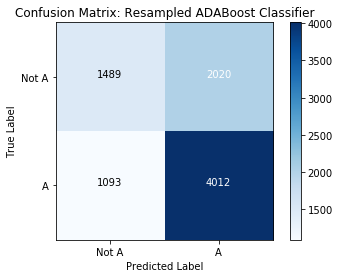

In [18]:
y_res_pred = grid_ada_res.best_estimator_.predict(X_resampled_test)
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_resampled_test,y_res_pred))
show_cf(y_test,y_pred,class_names=['Not A','A'],model_name='Resampled ADABoost Classifier')

In [19]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
param_grid_xgb= {
    "learning_rate": [0.3,0.5,0.7],
    'max_depth': [5,6,7],
    'min_child_weight': [0,1,3],
    'n_estimators': [10,100],
}
grid_xgb=GridSearchCV(estimator=xgb.XGBClassifier(),
                      param_grid=param_grid_xgb,
                     cv=3,
                     verbose=2)
grid_xgb.fit(X_resampled_train,y_resampled_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10, total=   2.8s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10, total=   1.8s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10, total=   1.8s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100, total=  15.7s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100, total=  15.7s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100, total=  16.1s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=10, total=   1.9s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  learning_r

[CV]  learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100, total=  20.0s
[CV] learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100, total=  20.1s
[CV] learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100, total=  20.2s
[CV] learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10, total=   1.9s
[CV] learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10, total=   2.0s
[CV] learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10, total=   1.9s
[CV] learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=100 
[CV]  learning_r

[CV]  learning_rate=0.5, max_depth=7, min_child_weight=1, n_estimators=100, total=  20.3s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=10, total=   2.3s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=10, total=   2.3s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=10, total=   2.3s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, total=  20.6s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, total=  20.5s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_r

[CV]  learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=10, total=   2.5s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=10 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=10, total=   2.3s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100, total=  22.5s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100, total=  21.1s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100, total=  20.8s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=10 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=10, total=   2.3s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=10 
[CV]  learning_r

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed: 27.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.3, 0.5, 0.7],
                         'max_depth': [5, 6, 7], 'min_child_weight': [0, 1, 3],
                         'n_

In [20]:
grid_xgb.best_params_

{'learning_rate': 0.5,
 'max_depth': 5,
 'min_child_weight': 0,
 'n_estimators': 100}

In [21]:
grid_xgb.best_score_

0.6751553551845985

              precision    recall  f1-score   support

       False       0.69      0.63      0.66      5184
        True       0.65      0.71      0.68      5075

    accuracy                           0.67     10259
   macro avg       0.67      0.67      0.67     10259
weighted avg       0.67      0.67      0.67     10259



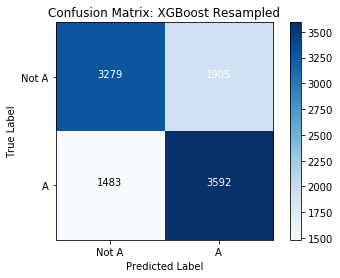

In [22]:
y_pred = grid_xgb.best_estimator_.predict(X_resampled_test)

print(classification_report(y_resampled_test,y_pred))
show_cf(y_resampled_test,y_pred,class_names=['Not A','A'],model_name='XGBoost Resampled')

In [24]:
grid_xgb.best_estimator_.feature_importances_

array([0.010012  , 0.01076739, 0.0109878 , 0.0126348 , 0.01541644,
       0.00628566, 0.01723995, 0.01433033, 0.00619878, 0.00937492,
       0.00667192, 0.00724308, 0.00723064, 0.01489766, 0.00146924,
       0.00705319, 0.00528477, 0.00571288, 0.00990529, 0.00639331,
       0.00624263, 0.00777781, 0.00310699, 0.0068237 , 0.01362121,
       0.00754159, 0.00621589, 0.0007242 , 0.        , 0.00292852,
       0.00738276, 0.01125305, 0.00444603, 0.00725996, 0.00913872,
       0.00927121, 0.00893502, 0.00536697, 0.00814584, 0.00693373,
       0.00565813, 0.00618055, 0.00510394, 0.01107747, 0.00484293,
       0.00620487, 0.00581305, 0.01347638, 0.00111461, 0.00747072,
       0.00819426, 0.00803497, 0.00808755, 0.00676826, 0.01193705,
       0.00681763, 0.00871102, 0.00873175, 0.00885587, 0.00808091,
       0.01205437, 0.0068474 , 0.0048156 , 0.00746724, 0.00047223,
       0.        , 0.00984755, 0.01278986, 0.01104989, 0.00568523,
       0.        , 0.00116693, 0.00260317, 0.01653595, 0.00166

In [25]:
sorted(grid_xgb.best_estimator_.feature_importances_,reverse=True)[:5]

[0.021360198, 0.019110141, 0.017239954, 0.016684528, 0.016535953]

Build Keras Deep Learning Neural Network to attempt to improve on Machine Learning model

In [13]:
X_train.shape

(51759, 153)

In [27]:
from keras import Sequential,layers,models

model=models.Sequential()
model.add(layers.Dense(100,input_shape=(155,),activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history0=model.fit(X_train,y_train,epochs=50,batch_size=256,validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 31007 samples, validate on 3446 samples
Epoch 1/50
31007/31007 [==============================] - 4s 125us/step - loss: 0.6740 - acc: 0.6026 - val_loss: 0.6317 - val_acc: 0.6538
Epoch 2/50
31007/31007 [==============================] - 0s 10us/step - loss: 0.6310 - acc: 0.6373 - val_loss: 0.6308 - val_acc: 0.6407
Epoch 3/50
31007/31007 [==============================] - 0s 10us/step - loss: 0.6295 - acc: 0.6394 - val_loss: 0.6289 - val_acc: 0.6521
Epoch 4/50
31007/31007 [==============================] - 0s 10us/step - loss: 0.6263 - acc: 0.6416 - val_loss: 0.6296 - val_acc: 0.6544
Epoch 5/50
31007/31007 [==============================] - 0s 10us/step - loss: 0.6266 - acc: 0.6404 - val_loss: 0.6303 - val_acc: 0.6515
Epoch 6/50
31007/31007 [==============================] - 0s 10us/step - loss: 0.6238 - acc: 0.6438 - val_loss: 0.6396 - val_acc: 0.6245
Epoch 7/50
31007/31007 [==============================] - 0s 10us/step - loss: 0

In [28]:
def plt_hist(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

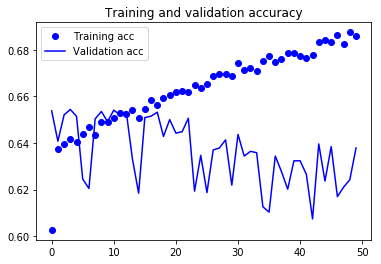

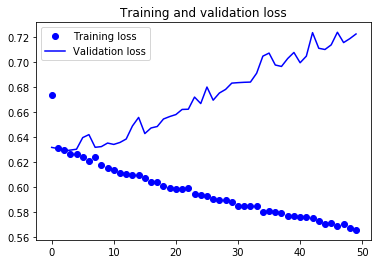

In [29]:
plt_hist(history0)